In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/incidents_12000.csv')  # use your path in Colab
df.head()


,incident_id,date,category,severity_level,sla_breached,time_to_resolve_hours,root_cause,region,channel,subsystem,is_repeated_incident,financial_impact_usd
0,8091,2023-07-01,Payments,Medium,Yes,10.4,User Error,North America,API,Customer Onboarding,0,1593.08
1,5764,2023-07-01,Funds Transfer,Low,No,4.3,User Error,LATAM,API,Core Banking,0,2535.04
2,1476,2023-07-01,API Failure,Low,Yes,18.4,Policy Exception,LATAM,API,Payments Gateway,0,1231.75
3,2518,2023-07-01,Funds Transfer,High,No,11.4,User Error,EMEA,Mobile,Authentication Server,0,271.69
4,7948,2023-07-01,Payments,Low,No,8.6,User Error,APAC,Branch,Risk Scoring Engine,0,278.59


In [2]:
df.info()
df.describe(include='all')
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   incident_id            12000 non-null  int64  
 1   date                   12000 non-null  object 
 2   category               12000 non-null  object 
 3   severity_level         12000 non-null  object 
 4   sla_breached           12000 non-null  object 
 5   time_to_resolve_hours  12000 non-null  float64
 6   root_cause             12000 non-null  object 
 7   region                 12000 non-null  object 
 8   channel                12000 non-null  object 
 9   subsystem              12000 non-null  object 
 10  is_repeated_incident   12000 non-null  int64  
 11  financial_impact_usd   12000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.1+ MB


np.int64(0)

In [3]:
total_incidents = len(df)
sla_breach_rate = df['sla_breached'].value_counts(normalize=True)['Yes']
avg_resolution_time = df['time_to_resolve_hours'].mean()
total_financial_impact = df['financial_impact_usd'].sum()
repeat_incident_rate = df['is_repeated_incident'].mean()

kpis = {
    "Total Incidents": total_incidents,
    "SLA Breach Rate (%)": round(sla_breach_rate * 100, 2),
    "Average Resolution Time (hrs)": round(avg_resolution_time, 2),
    "Total Financial Impact ($)": round(total_financial_impact, 2),
    "Repeated Incident Rate (%)": round(repeat_incident_rate * 100, 2)
}

kpis


{'Total Incidents': 12000,
 'SLA Breach Rate (%)': np.float64(22.18),
 'Average Resolution Time (hrs)': np.float64(10.04),
 'Total Financial Impact ($)': np.float64(49242368.17),
 'Repeated Incident Rate (%)': np.float64(14.58)}

<Axes: title={'center': 'Incidents Over Time'}, xlabel='date'>

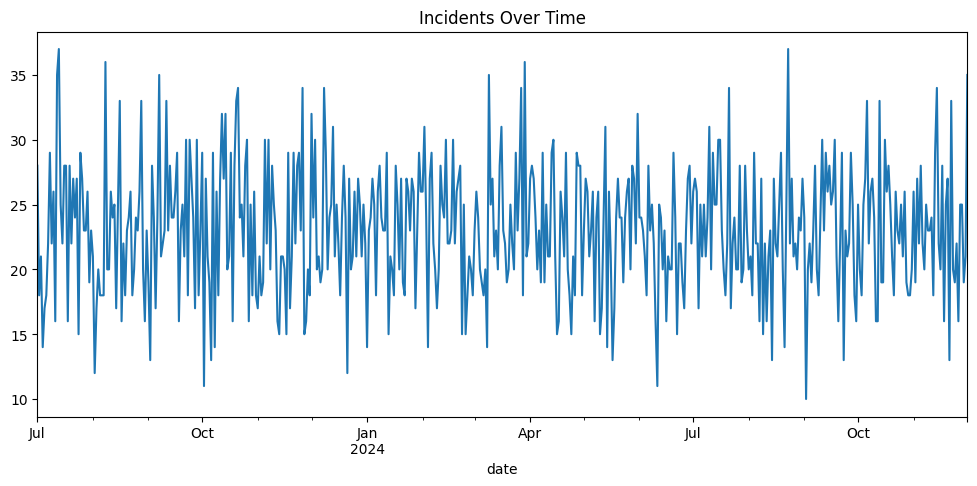

In [4]:
df['date'] = pd.to_datetime(df['date'])

incidents_over_time = df.groupby('date').size()

incidents_over_time.plot(figsize=(12,5), title='Incidents Over Time')


In [5]:
df['severity_level'].value_counts()


,count
severity_level,
Low,6521
Medium,3052
High,1828
Critical,599


In [6]:
df.groupby('severity_level')['sla_breached'].value_counts(normalize=True)


severity_level  sla_breached
Critical        No              0.808013
                Yes             0.191987
High            No              0.768053
                Yes             0.231947
Low             No              0.783622
                Yes             0.216378
Medium          No              0.767038
                Yes             0.232962
Name: proportion, dtype: float64

In [7]:
df['root_cause'].value_counts()


,count
root_cause,
User Error,2083
Configuration Issue,2027
Network Issue,2006
System Error,1986
Vendor Delay,1965
Policy Exception,1933


In [8]:
df.groupby('root_cause')['sla_breached'].value_counts(normalize=True)


root_cause           sla_breached
Configuration Issue  No              0.771090
                     Yes             0.228910
Network Issue        No              0.769192
                     Yes             0.230808
Policy Exception     No              0.765649
                     Yes             0.234351
System Error         No              0.779456
                     Yes             0.220544
User Error           No              0.795487
                     Yes             0.204513
Vendor Delay         No              0.787786
                     Yes             0.212214
Name: proportion, dtype: float64

In [10]:
df['subsystem'].value_counts()


,count
subsystem,
Authentication Server,2052
Data Warehouse,2027
Risk Scoring Engine,1998
Customer Onboarding,1998
Payments Gateway,1974
Core Banking,1951


In [11]:
df['region'].value_counts()


,count
region,
North America,3056
APAC,3031
EMEA,2965
LATAM,2948


In [12]:
df['channel'].value_counts()


,count
channel,
Mobile,3090
Web,3043
Branch,2959
API,2908


In [13]:
df.groupby('subsystem')['time_to_resolve_hours'].mean().sort_values()


,time_to_resolve_hours
subsystem,
Authentication Server,9.899172
Core Banking,10.017581
Risk Scoring Engine,10.027978
Payments Gateway,10.041743
Customer Onboarding,10.086386
Data Warehouse,10.172373
